## Linear regression

In [141]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
# Import the reviews data.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [143]:
# View the metadata.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


There are no missing values in the data.

In [144]:
reviews.describe(include='all')

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
count,2000,2000.000000,2000.000000,2000.000000,2000.000000,2000,2000,2000,2000.000000,2000,2000
unique,2,NaN,NaN,NaN,NaN,5,1,1,NaN,1980,1432
top,Female,NaN,NaN,NaN,NaN,graduate,EN,Web,NaN,love it,Five Stars
freq,1120,NaN,NaN,NaN,NaN,900,2000,2000,NaN,5,378
mean,NaN,39.495000,48.079060,50.000000,1578.032000,NaN,NaN,NaN,4320.521500,NaN,NaN
std,NaN,13.573212,23.123984,26.094702,1283.239705,NaN,NaN,NaN,3148.938839,NaN,NaN
min,NaN,17.000000,12.300000,1.000000,25.000000,NaN,NaN,NaN,107.000000,NaN,NaN
25%,NaN,29.000000,30.340000,32.000000,772.000000,NaN,NaN,NaN,1589.250000,NaN,NaN
50%,NaN,38.000000,47.150000,50.000000,1276.000000,NaN,NaN,NaN,3624.000000,NaN,NaN
75%,NaN,49.000000,63.960000,73.000000,1751.250000,NaN,NaN,NaN,6654.000000,NaN,NaN


Average age is 39 and ranges from 17 to 72.

Average income is £48K and ranges from £12.3K to £112K.

Average spending score is 50 and ranges from 1 to 99.

Average loyalty points is 1,578 and ranges from 25 to 6,847.

In [145]:
# Drop unnecessary columns
reviews.drop('platform', axis=1, inplace=True) 
reviews.drop('language', axis=1, inplace=True) 

# View the DataFrame.
reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [146]:
# Rename columns.
reviews.rename(columns={'remuneration (k£)': 'remuneration', 'spending_score (1-100)': 'spending_score'}, inplace=True)

# View the DataFrame.
reviews.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [147]:
# Export dataframe to csv.
reviews.to_csv("clean_reviews.csv", index=False)

In [148]:
# Import new csv to sense check.
clean_reviews = pd.read_csv('clean_reviews.csv')

clean_reviews.shape

(2000, 9)

In [149]:
# Explore linear relationships between loyalty points and age/remuneration/spending scores.
# Install the statsmodels package.
!pip install statsmodels

# The statsmodels.
import statsmodels.api as sm 
from statsmodels.formula.api import ols


#### Loyalty Points & Remuneration

Text(0, 0.5, 'Loyalty Points')

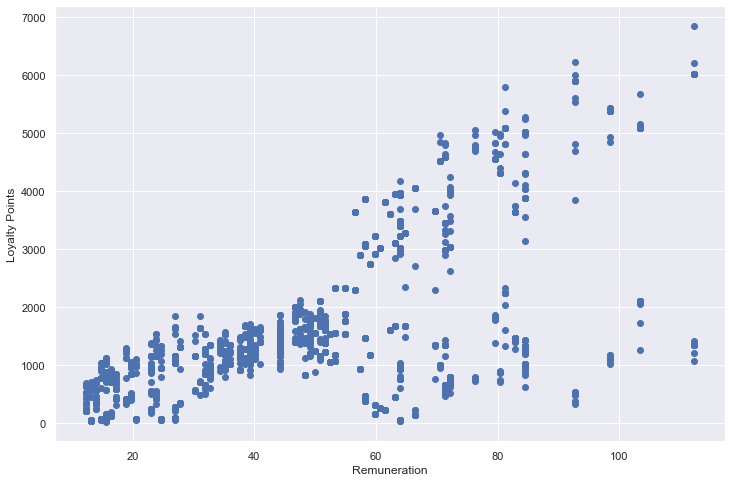

In [150]:
# Define the dependent variable.
y = clean_reviews['loyalty_points'] 

# Define the independent variable.
x = clean_reviews['remuneration'] 

# Check for linearity with Matplotlib.
plt.scatter(x, y)
plt.xlabel("Remuneration")
plt.ylabel("Loyalty Points")

In [151]:
# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = clean_reviews).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Fri, 23 Dec 2022   Prob (F-statistic):          2.43e-209
Time:                        14:26:13   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [152]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())  


Parameters:  Intercept   -65.686513
x            34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x             0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [153]:
# fit the simple linear regression model using the values returned in the previous step
# Create the linear regression model.
y_pred = (-65.686513) + 34.187825 * clean_reviews['remuneration']

# View the output
y_pred

# There are now predicted dependent values (Loyalty Points) for each independent value (Remuneration)
# based on the simple linear regression model.

0        354.823735
1        354.823735
2        382.857751
3        382.857751
4        410.891767
           ...     
1995    2821.817186
1996    3102.157351
1997    3102.157351
1998    3298.395467
1999    3102.157351
Name: remuneration, Length: 2000, dtype: float64

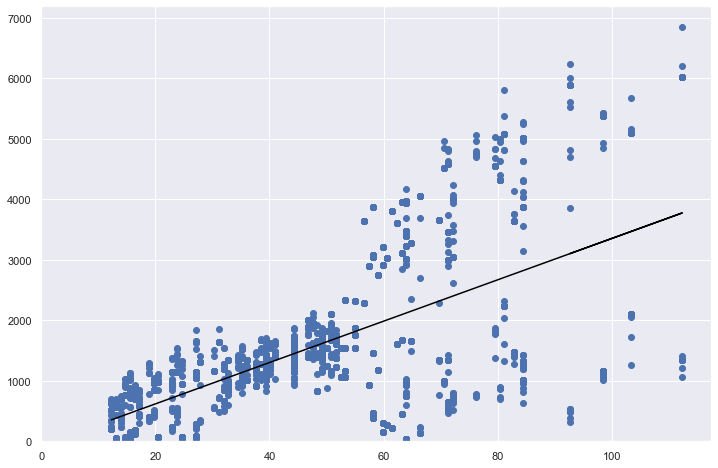

In [154]:
# Plot the data points with a scatterplot.
plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, y_pred, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

Although there is an overall positive relationship between Loyalty Points and Renumeration, the OLS model shows that Renumeration is only able to explain 38% of the variation of Loyalty Points.

#### Loyalty Points & Spending Score

Text(0, 0.5, 'Loyalty Points')

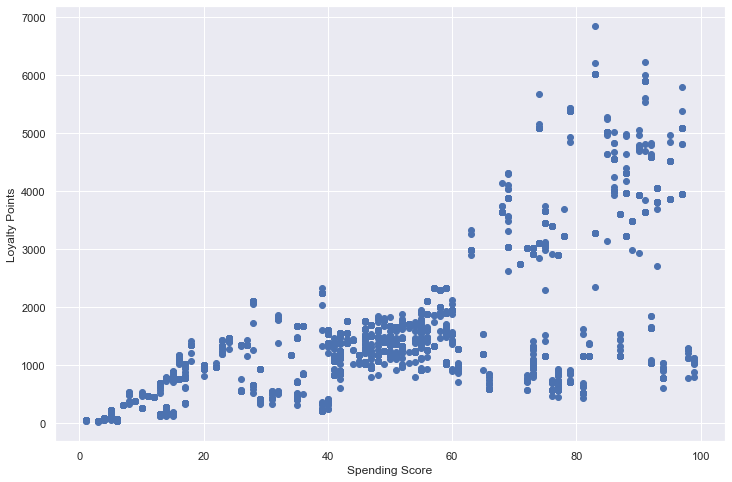

In [155]:
# Define the dependent variable.
y = clean_reviews['loyalty_points'] 

# Define the independent variable.
x = clean_reviews['spending_score'] 

# Check for linearity with Matplotlib.
plt.scatter(x, y)
plt.xlabel("Spending Score")
plt.ylabel("Loyalty Points")

In [156]:
# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = clean_reviews).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Fri, 23 Dec 2022   Prob (F-statistic):          2.92e-263
Time:                        14:26:13   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [157]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())  


Parameters:  Intercept   -75.052663
x            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [158]:
# fit the simple linear regression model using the values returned in the previous step
# Create the linear regression model.
y_pred = (-75.052663) + 33.061693 * clean_reviews['spending_score']

# View the output
y_pred

# There are now predicted dependent values (Loyalty Points) for each independent value (Spending Score)
# based on the simple linear regression model.

0       1214.353364
1       2602.944470
2        123.317495
3       2470.697698
4       1247.415057
           ...     
1995    2206.204154
1996     189.440881
1997    2933.561400
1998     453.934425
1999     189.440881
Name: spending_score, Length: 2000, dtype: float64

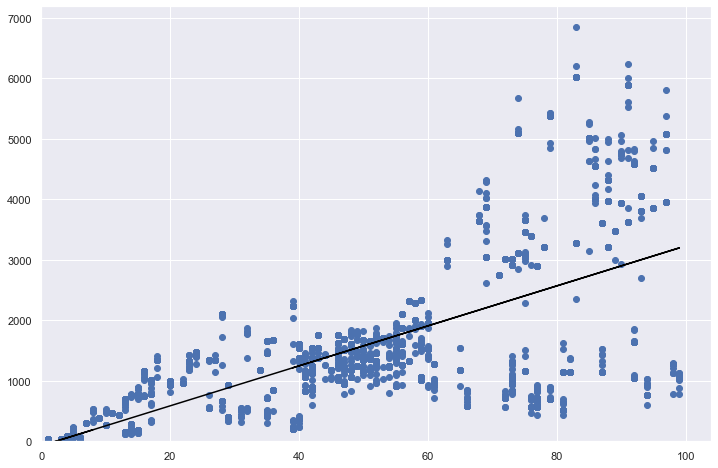

In [159]:
# Plot the data points with a scatterplot.
plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, y_pred, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

Although there is an overall positive relationship between Loyalty Points and Spending Score, the OLS model shows that Spending Score is only able to explain 45% of the variation of Loyalty Points.

#### Loyalty Points & Age

Text(0, 0.5, 'Loyalty Points')

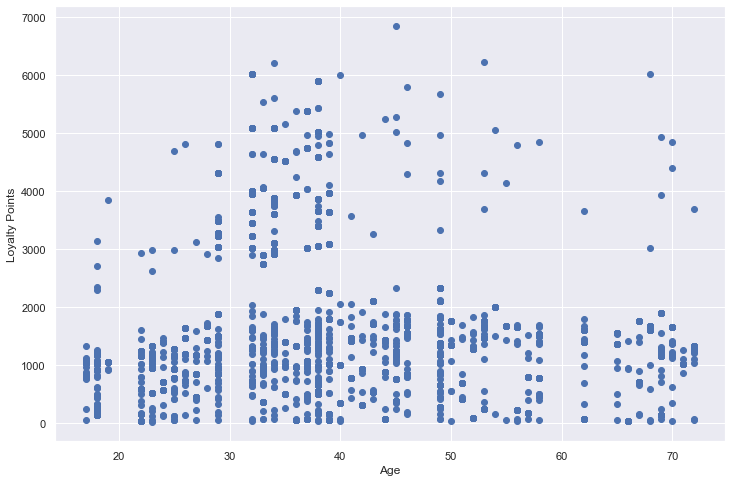

In [160]:
# Define the dependent variable.
y = clean_reviews['loyalty_points'] 

# Define the independent variable.
x = clean_reviews['age'] 

# Check for linearity with Matplotlib.
plt.scatter(x, y)
plt.xlabel("Age")
plt.ylabel("Loyalty Points")

In [161]:
# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = clean_reviews).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Fri, 23 Dec 2022   Prob (F-statistic):             0.0577
Time:                        14:26:13   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [162]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())  


Parameters:  Intercept    1736.517739
x              -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
x             2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [163]:
# fit the simple linear regression model using the values returned in the previous step
# Create the linear regression model.
y_pred = (1736.517739) + -4.012805 * clean_reviews['age']

# View the output
y_pred

# There are now predicted dependent values (Loyalty Points) for each independent value (age)
# based on the simple linear regression model.

0       1664.287249
1       1644.223224
2       1648.236029
3       1636.197614
4       1604.095174
           ...     
1995    1588.043954
1996    1563.967124
1997    1600.082369
1998    1600.082369
1999    1608.107979
Name: age, Length: 2000, dtype: float64

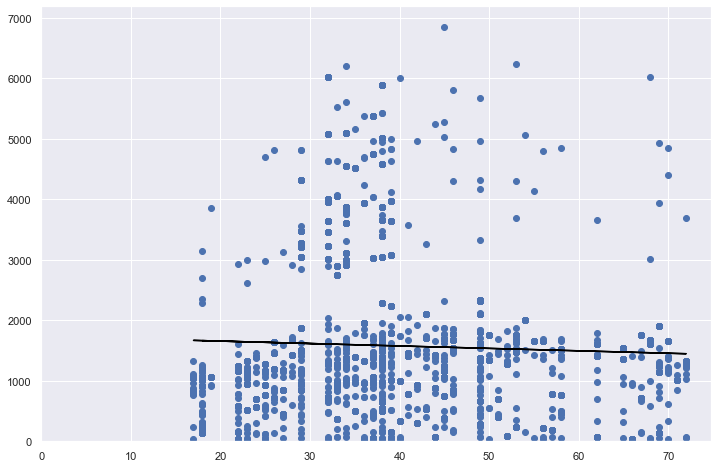

In [164]:
# Plot the data points with a scatterplot.
plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, y_pred, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

There is no significant relationship between Loyalty Points and Age, the OLS model shows that Age is only able to explain 0.02% of the variation of Loyalty Points which is basically nothing.

## Clustering with k-means

In [165]:
# Create new dataframe containing only remuneration and spending score columns.
df2 = clean_reviews[['remuneration', 'spending_score']]
df2.head()

,remuneration,spending_score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40


In [166]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   remuneration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [167]:
df2.describe()

,remuneration,spending_score
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

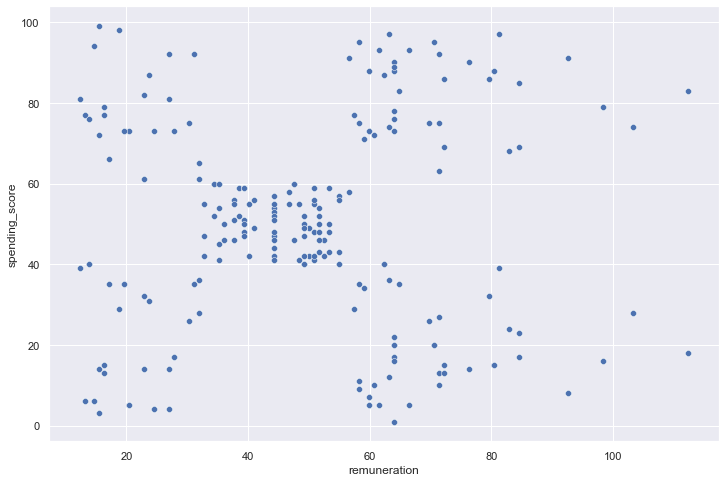

In [168]:
# Import Seaborn and Matplotlib.
from matplotlib import pyplot as plt
import seaborn as sns

# Create a scatterplot with Seaborn.
sns.scatterplot(x='remuneration',
                y='spending_score',
                data=df2)

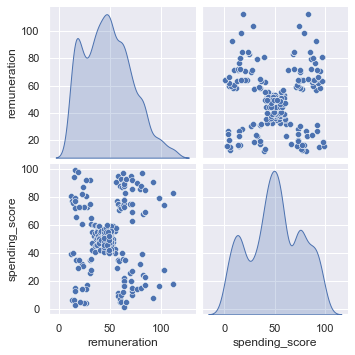

In [169]:
# Create a pairplot with Seaborn.
x = df2[['remuneration', 'spending_score']]

sns.pairplot(df2,
             vars=x,
             diag_kind='kde')

The scatterplots seem to show 5 clear clusters.

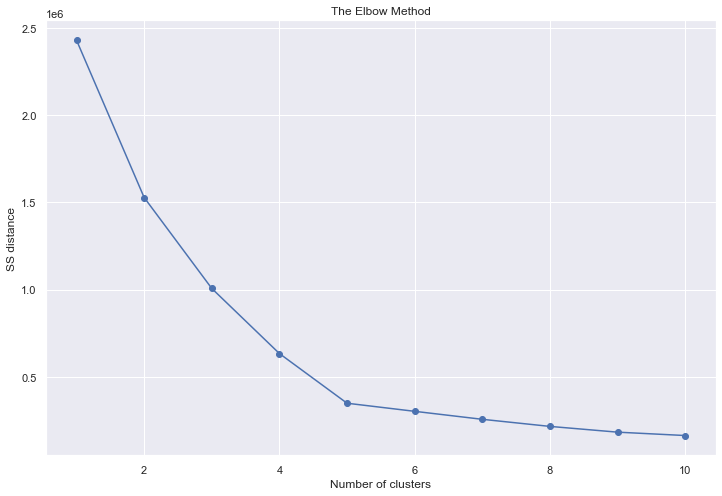

In [170]:
# Elbow Method
# Import the KMeans class.
from sklearn.cluster import KMeans 

# Elbow chart for us to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

# Plot the elbow method.
plt.plot(range(1, 11),
         ss,
         marker='o')

# Insert labels and title.
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS distance")

plt.show()

Using the grapth created with the Elbow Method, it appears the optimal number of clusters is 5 as this is the point where we see the line curve like an elbow.

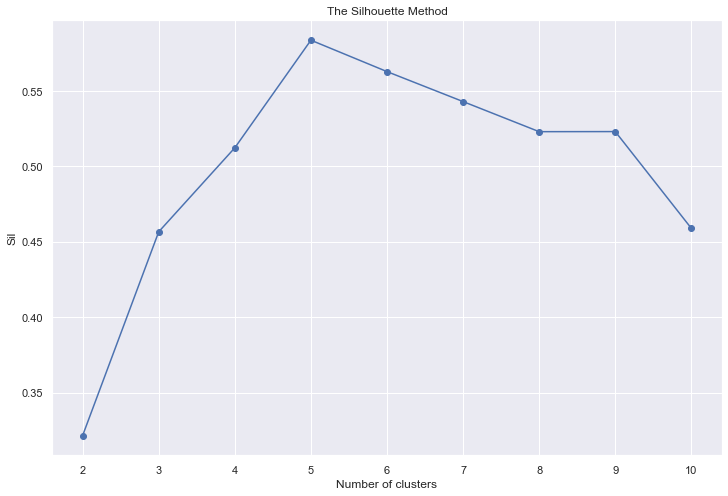

In [171]:
# Silhouette Method
# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric='euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

# Insert labels and title.
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

The Silhouette Method also indicated the optimal number of clusters to be 5 as this is where the line peaks on the graph, followed by 6 and 7.

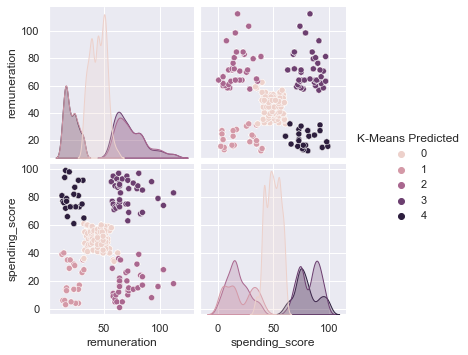

In [172]:
# Evaluate and fit the model for 5,6 and 7 clusters.
# Use five clusters.
kmeans = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [173]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    774
3    356
2    330
1    271
4    269
Name: K-Means Predicted, dtype: int64

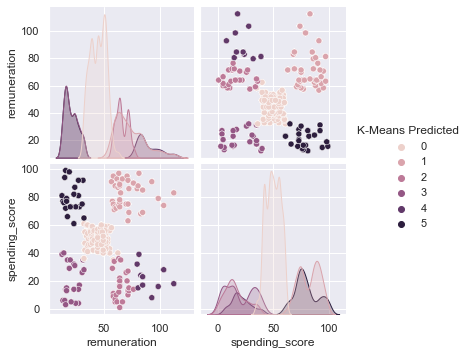

In [174]:
# Use six clusters.
kmeans = KMeans(n_clusters = 6, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [175]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    767
1    356
3    271
5    269
2    214
4    123
Name: K-Means Predicted, dtype: int64

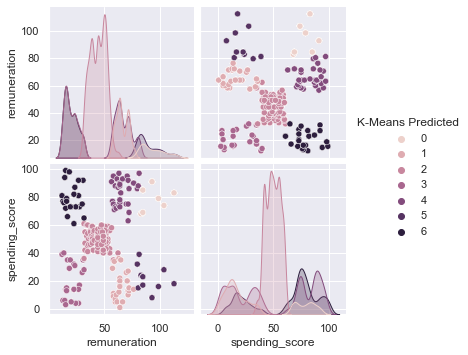

In [176]:
# Use seven clusters.
kmeans = KMeans(n_clusters = 7, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [177]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

2    767
3    271
4    271
6    269
1    214
5    123
0     85
Name: K-Means Predicted, dtype: int64

Looking at the value counts of each cluster, they are most balanced when using five clusters, although there is one big cluster which is much larger than the rest. When increasing the number of clusers we end up dividing the smallers clusers into smallers clusters and do not achieve a balance in the value counts. It seems five is the optimal number for K.

In [178]:
# Use five clusters.
kmeans = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters


<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

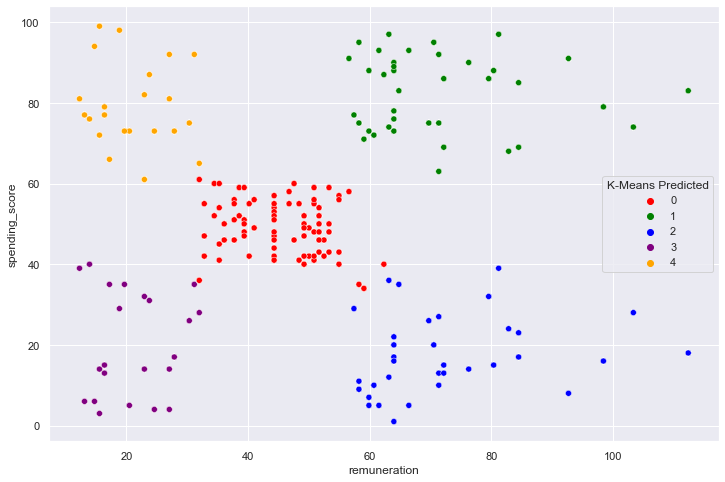

In [179]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

# Create a scatterplot.
sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=x,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'purple', 'orange'])

The plot shows there are five clear clusters of customers: 
- High income, low spenders in Blue
- Low income, low spenders in Green
- High Income, high spenders in Purple
- Low income, high spenders in Orange
- Mid income, mid spenders in Red

The biggest cluster of customers is the Red cluster of mid income mid spenders.

## NLP

In [180]:
import warnings
warnings.filterwarnings("ignore")

In [181]:
# Create new dataframe containing only review and summary columns.
df3 = clean_reviews[['review', 'summary']]
df3.head()

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap


In [182]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   2000 non-null   object
 1   summary  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


There are no null values.

In [183]:
# Transform data to lowercase.
df3['review'] = df3['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df3['review'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [184]:
# Transform data to lowercase.
df3['summary'] = df3['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df3['summary'].head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

In [185]:
# Remove punctuation.
df3['review'] = df3['review'].str.replace('[^\w\s]','')

# Preview the result.
df3['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [186]:
# Remove punctuation.
df3['summary'] = df3['summary'].str.replace('[^\w\s]','')

# Preview the result.
df3['summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

In [187]:
# Check the number of duplicate values in the COMMENTS column.
df3.review.duplicated().sum()

50

In [188]:
# Check the number of duplicate values in the COMMENTS column.
df3.summary.duplicated().sum()

649

In [211]:
# Drop duplicates.
df4 = df3.drop_duplicates(subset=['review','summary'])

# Preview data.
df4.reset_index(inplace=True)
df4.head()

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap


In [190]:
# Import nltk and download nltk's resources to assist with tokenisation.
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/aisha.cormio/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [191]:
# Create copy a of the dataframe.
df5 = df4

In [192]:
# Apply tokenisation to review and summary columns.
df5['review'] = df5['review'].apply(word_tokenize)

# Preview data.
df5['review'].head()

0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: review, dtype: object

In [193]:
# Apply tokenisation to review and summary columns.
df5['summary'] = df5['summary'].apply(word_tokenize)

# Preview data.
df5['summary'].head()

0    [the, fact, that, 50, of, this, space, is, was...
1    [another, worthless, dungeon, masters, screen,...
2                 [pretty, but, also, pretty, useless]
3                                        [five, stars]
4                                        [money, trap]
Name: summary, dtype: object

In [194]:
# Define an empty list of tokens.
all_review_tokens = []

for i in range(df5.shape[0]):
    # Add each token to the list.
    all_review_tokens = all_review_tokens + df5['review'][i]

In [195]:
# Filter out tokens that are neither alphabets nor numbers (to eliminate punctuation marks, etc.).
review_tokens = [word for word in all_review_tokens if word.isalnum()]

In [196]:
# Download the stop word list.
nltk.download ('stopwords')
from nltk.corpus import stopwords

# Create a set of English stop words.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stop words.
review_tokens2 = [x for x in review_tokens if x.lower() not in english_stopwords]

# Define an empty string variable.
review_tokens2_string = ''

for value in review_tokens:
    # Add each filtered token word to the string.
    review_tokens2_string = review_tokens2_string + value + ' '

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aisha.cormio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [197]:
# Import along with matplotlib and seaborn for visualisation.
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import seaborn as sns

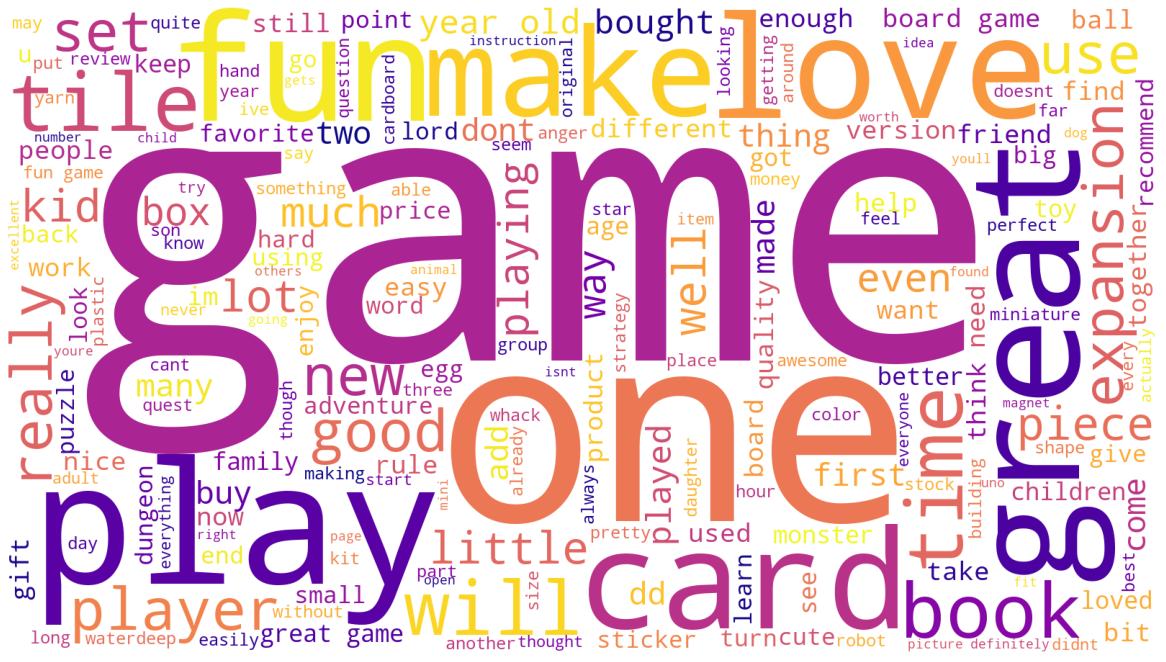

In [198]:
# Create a WordCloud for Reviews.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(review_tokens2_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()


In [199]:
# Define an empty list of tokens.
all_summary_tokens = []

for i in range(df5.shape[0]):
    # Add each token to the list.
    all_summary_tokens = all_summary_tokens + df5['summary'][i]

In [200]:
# Filter out tokens that are neither alphabets nor numbers (to eliminate punctuation marks, etc.).
summary_tokens = [word for word in all_summary_tokens if word.isalnum()]

In [201]:
# Create a filtered list of tokens without stop words.
summary_tokens2 = [x for x in summary_tokens if x.lower() not in english_stopwords]

# Define an empty string variable.
summary_tokens2_string = ''

for value in summary_tokens:
    # Add each filtered token word to the string.
    summary_tokens2_string = summary_tokens2_string + value + ' '

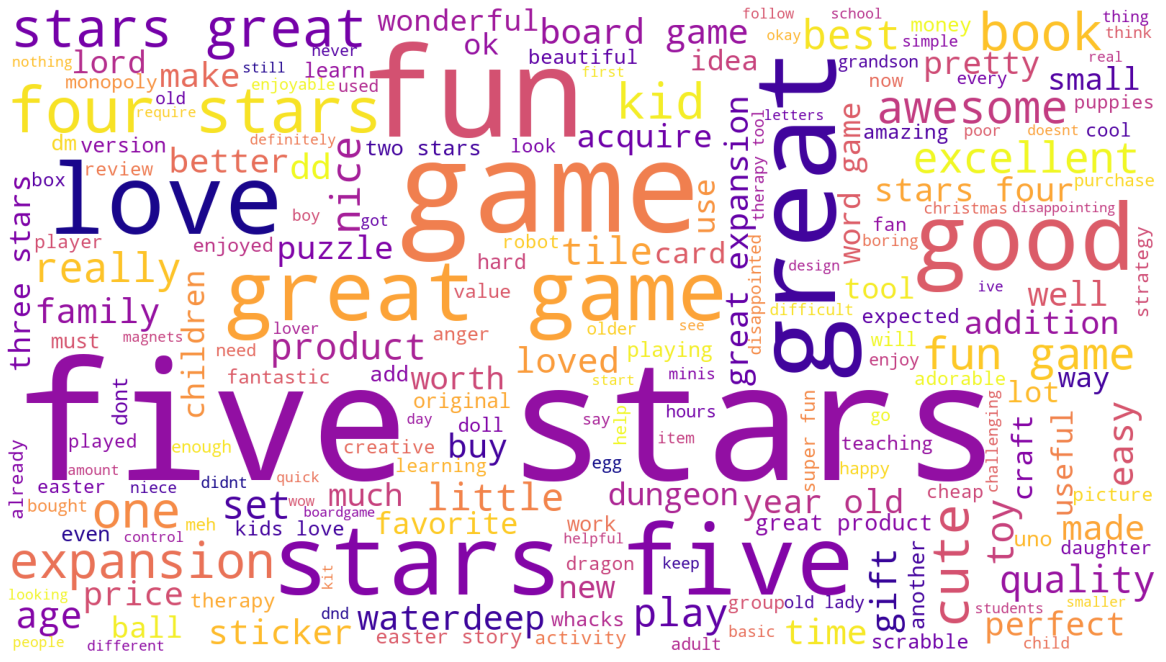

In [202]:
# Create a WordCloud for summary.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(summary_tokens2_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [203]:
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter.
counts = pd.DataFrame(Counter(review_tokens2).most_common(15),
                      columns=['Word', 'Frequency'])

# Preview data.
counts

,Word,Frequency
0,game,1671
1,great,580
2,fun,552
3,one,530
4,play,502
5,like,414
6,love,323
7,really,319
8,get,319
9,cards,301


In [208]:
# Import the necessary package.
from textblob import TextBlob

In [209]:
def generate_polarity(word):
    return TextBlob(word).sentiment[0]

# Populate a new column with polarity scores for each word.
counts['polarity'] = counts['Word'].apply(generate_polarity)

# View the top 15 words.
counts

,Word,Frequency,polarity
0,game,1671,-0.4
1,great,580,0.8
2,fun,552,0.3
3,one,530,0.0
4,play,502,0.0
5,like,414,0.0
6,love,323,0.5
7,really,319,0.2
8,get,319,0.0
9,cards,301,0.0


In [215]:
# Drop duplicates.
df4 = df3.drop_duplicates(subset=['review','summary'])

# Preview data.
df4.reset_index(inplace=True)
df4.head()

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap


In [212]:
# Define a function to extract a polarity score for the comment.
def generate_polarity(comment):
    return TextBlob(comment).sentiment[0]

# Populate a new column with polarity scores for each comment.
df4['review_polarity'] = df4['review'].apply(generate_polarity)

# Preview the result.
df4.head()

,index,review,summary,review_polarity
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,-0.036111
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,0.035952
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless,0.116640
3,3,amazing buy bought it as a gift for our new dm...,five stars,0.578788
4,4,as my review of gf9s previous screens these we...,money trap,-0.316667


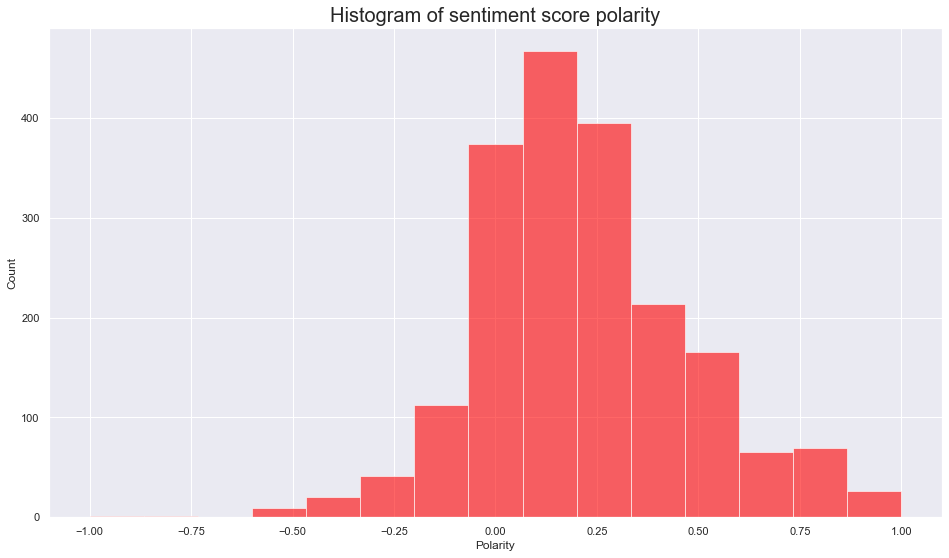

In [213]:
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df4['review_polarity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity', fontsize=20)

plt.show()

In [214]:
# Define a function to extract a polarity score for the comment.
def generate_polarity(comment):
    return TextBlob(comment).sentiment[0]

# Populate a new column with polarity scores for each comment.
df4['summary_polarity'] = df4['summary'].apply(generate_polarity)

# Preview the result.
df4.head()

,index,review,summary,review_polarity,summary_polarity
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,-0.036111,0.15
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,0.035952,-0.80
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless,0.116640,0.00
3,3,amazing buy bought it as a gift for our new dm...,five stars,0.578788,0.00
4,4,as my review of gf9s previous screens these we...,money trap,-0.316667,0.00


In [ ]:
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df4['summary_polarity'], num_bins, facecolor='blue', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity', fontsize=20)

plt.show()

In [ ]:
# Extract top 20 positive reviews.
# Create a DataFrame.
positive_reviews = df4.nlargest(20, 'review_polarity')

# Adjust the column width.
positive_reviews.style.set_properties(subset=['review'], **{'width': '1000px'})


In [ ]:
# Extract top 20 negative reviews.
# Create a DataFrame.
negative_reviews = df4.nsmallest(20, 'review_polarity')

# Adjust the column width.
negative_reviews.style.set_properties(subset=['review'], **{'width': '1000px'})


In [ ]:
# Extract top 20 positive summaries.
# Create a DataFrame.
positive_summary = df4.nlargest(20, 'summary_polarity')

# Adjust the column width.
positive_summary.style.set_properties(subset=['summary'], **{'width': '300px'})


In [ ]:
# Extract top 20 negative summaries.
# Create a DataFrame.
negative_summary = df4.nsmallest(20, 'summary_polarity')

# Adjust the column width.
negative_summary.style.set_properties(subset=['summary'], **{'width': '300px'})


Overall review sentiments are positive. When looking as summary sentiments a large portion is neutral, however when looking at the top 20 positive reviews we see most summaries are 'five stars' but have a sentiment score of 0 (neutral) indicating the sentiment analysis is not able to reconise five stars as a positive comment. Having noted this, it is best to focus on the sentiment scores of reviews rather than summaries. 

The top 15 used words are mostly neutral or positive, with no negative words making the top used words list (although the word game is classified as negative I would personally classify it as neutral).